# ctdproc: test fleat data cast 5

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
from pathlib import Path
from scipy.interpolate import interp1d
# import ctdproc as ctd
import gvpy as gv


plt.ion()

%reload_ext autoreload
%autoreload 2

%config InlineBackend.figure_format = 'retina'

In [2]:
c1 = xr.open_dataset('fleat16_cast130_ts_test.nc')

In [3]:
m1 = gv.io.loadmat('/Users/gunnar/Projects/fleat/data/proc/RR1607/ctd/24hz/fleat16_ctd_cast_130_raw.mat')

found only one variable, returning munchified data structure


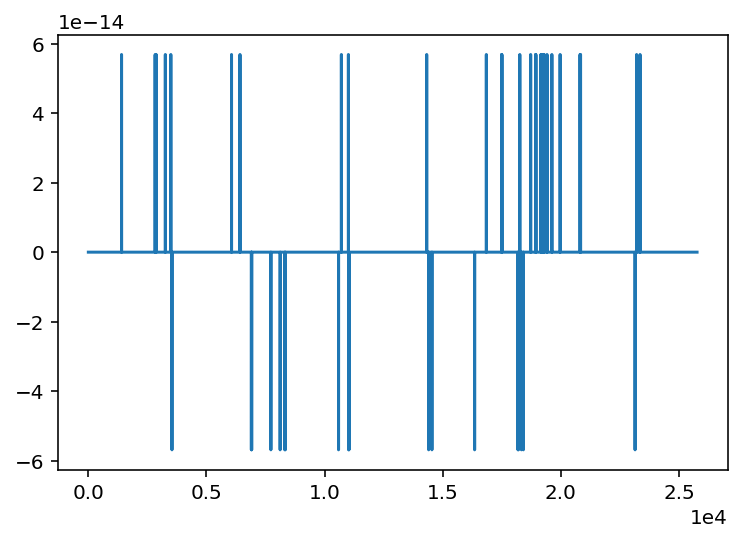

In [4]:
plt.plot(c1.t1 - m1.t1[1:])

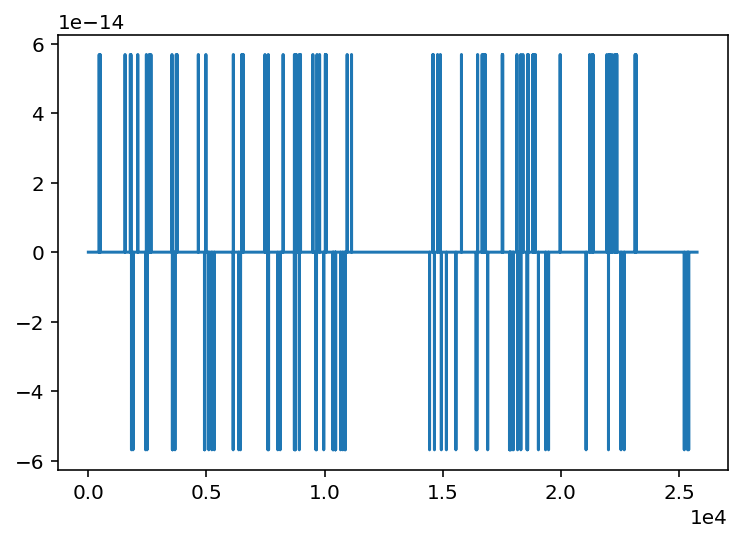

In [5]:
plt.plot(c1.t2 - m1.t2[1:])

ok, temperature time series match. we are missing one last data point, but that's not terrible.

What's up with conductivity? it's fine.

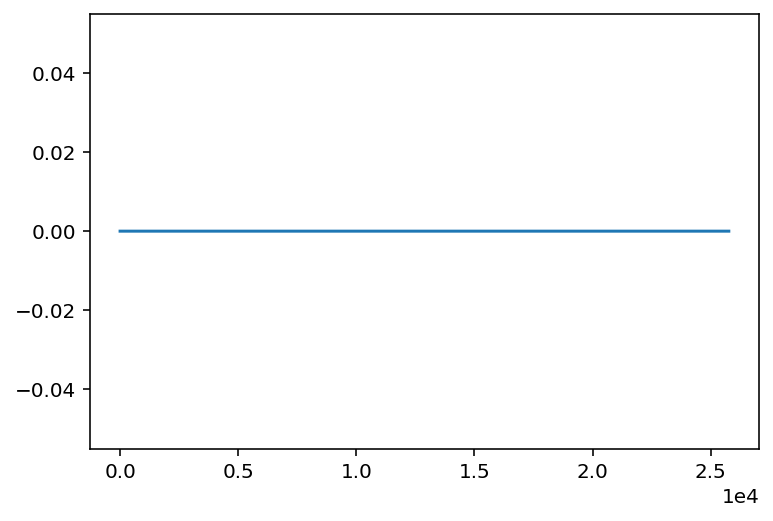

In [6]:
plt.plot(c1.c2 - m1.c2[1:])

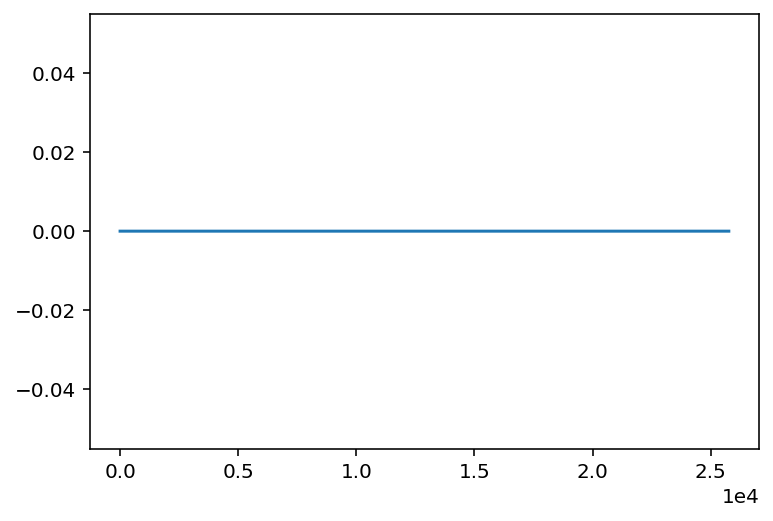

In [7]:
plt.plot(c1.c1 - m1.c1[1:])

pressure ok

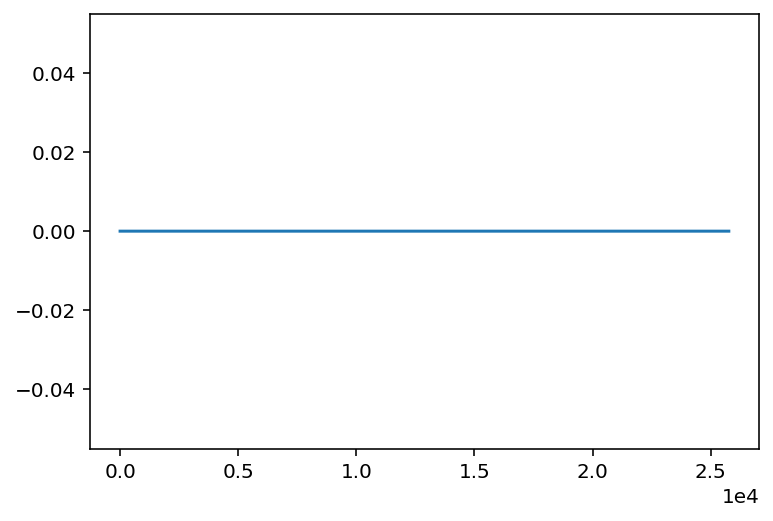

In [8]:
plt.plot(c1.p - m1.p[1:])

fleat didn't read mod count correctly

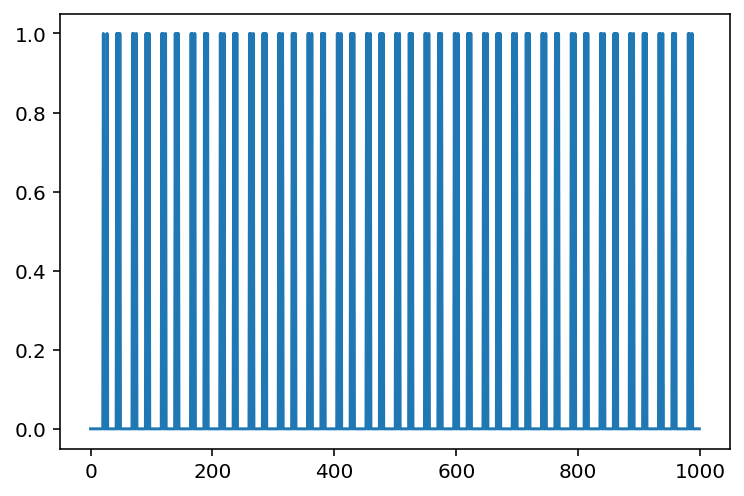

In [9]:
plt.plot(m1.modcount[:1000])

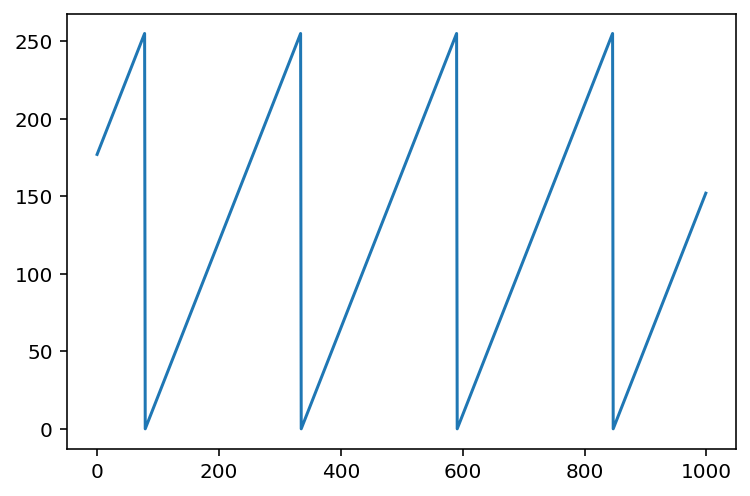

In [10]:
plt.plot(c1.modcount[:1000])

transmissometer should hover around 100%. ok.

/Users/gunnar/software/miniconda3/envs/ana/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


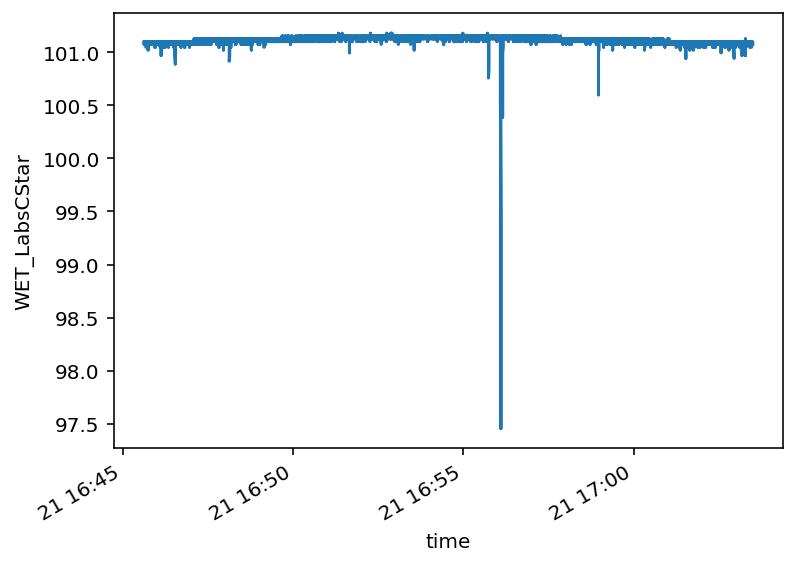

In [11]:
c1.trans.plot()

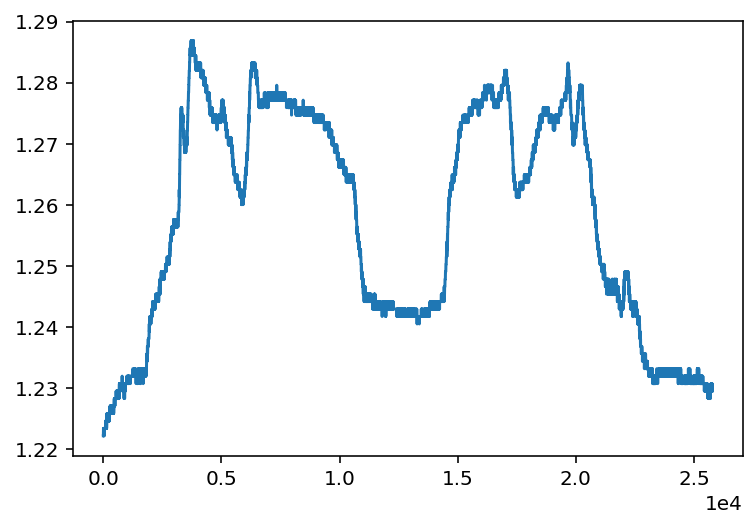

In [12]:
plt.plot(m1.trans)

In [13]:
m1.keys()

dict_keys(['t1', 'c1', 'p', 't2', 'c2', 'fl', 'trans', 'oxygen', 'lon', 'lat', 'modcount', 'time', 'tcfit'])

In [14]:
c = xr.open_dataset('fleat16_cast130_test.nc')

In [40]:
m = gv.io.loadmat('/Users/gunnar/Projects/fleat/data/proc/RR1607/ctd/prof/fleat16_ctd_cast_130.mat')
m = m.datad_1m

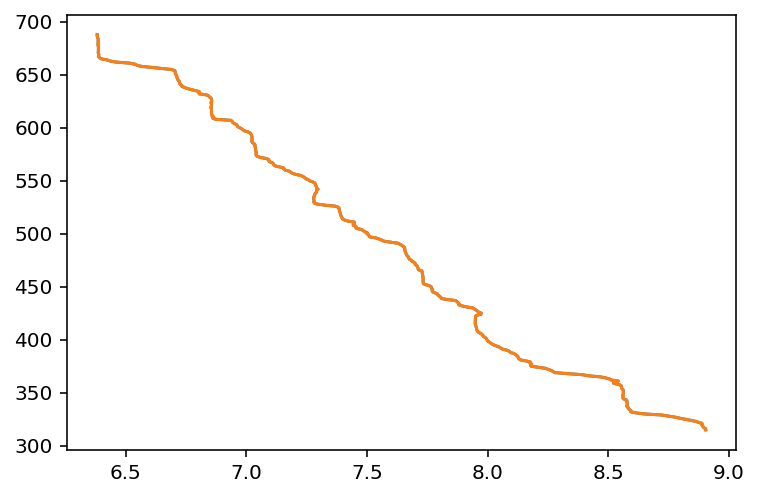

In [23]:
plt.plot(c.t1, c.depth)
plt.plot(m.t1, m.depth)

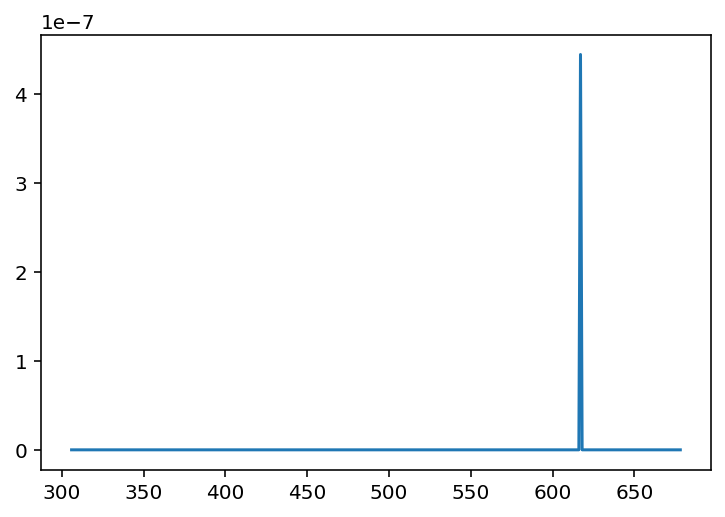

In [42]:
var = 'lat'
f = interp1d(m.depth, m[var], bounds_error=False)
oldt1 = f(c.depth)
plt.plot(c[var]-oldt1)
# plt.gca().set(ylim=(-1e-5, 1e-5))